In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as geo

In [3]:
illegaldumpsites = pd.read_csv("illegaldumpsites.csv")
illegaldumpsites.head()

,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude,Unnamed: 8
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525,NaN
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,NaN,40.42370101,-79.98657393,NaN
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,NaN,40.42427063,-79.99022675,NaN
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958,NaN
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,NaN,40.42372131,-79.99478912,NaN


We'll use this data set to find information on the illegal dumping of trash in different pittsburgh neighborhoods.

I first used the "drop" function to get rid of the location descriptions since they have no relevance to the amount of trash in a neighborhood. 

In [4]:
#use drop with 'location_description' to get rid of this column
illegaldumpsites.drop('location_description', axis=1, inplace=True)

Then, I had to get rid of all the rows with null values in the estimated tons column so i was left with the rows with usable values. The dropna function drops any rows with null values so I specified that I was working with the subset of estimated tons so that it doesn't just delete rows with null values anywhere.

In [5]:
#Use dropna to get rid of null values in the subset 'estimated_tons'
sites_with_tons = illegaldumpsites.dropna(subset = ['estimated_tons'])
sites_with_tons.head()

,site_name,Status,City,Neighborhood,estimated_tons,latitude,longitude,Unnamed: 8
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,40.42221971,-79.99022525,NaN
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,40.42370101,-79.98657393,NaN
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,40.42427063,-79.99022675,NaN
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,40.42327242,-79.99248958,NaN
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,40.42372131,-79.99478912,NaN


Since there is some data from outside of Pittsburgh, I created a query mask to filter out any data that doesn't belong to pittsburgh.

In [6]:
#query mask to filter out rows with cities other than Pittsburgh
query_mask = sites_with_tons['City'] == 'Pittsburgh'
pittsburgh = sites_with_tons[query_mask]
pittsburgh.head(5)

,site_name,Status,City,Neighborhood,estimated_tons,latitude,longitude,Unnamed: 8
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,40.42221971,-79.99022525,NaN
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,40.42370101,-79.98657393,NaN
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,40.42427063,-79.99022675,NaN
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,40.42327242,-79.99248958,NaN
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,40.42372131,-79.99478912,NaN


Now that I got rid of the unwanted data, I made a copy of the pittsburgh slice so it could undergo changes.

In [8]:
#make copy of pittsburgh data slice
copy_pittsburgh = pittsburgh.copy()

It seems that the estimated tons values are strings, So I'll have to convert them to numeric values in order to perform operations.

In [9]:
#use to_numeric to convert the values in 'estimate_tons' from strings to numerics
copy_pittsburgh["estimated_tons"]= copy_pittsburgh["estimated_tons"].apply(pd.to_numeric)

To find the total of trash illegally dumped per neighborhood, I used groupby to find the sum of estimated tons for each neighborhood.The code will add up our totals for each neighborhood.

In [10]:
#use groupby by to group data by neighborhoods and sum to find the total of estimated tons per neighborhood
neighborhood_totals = copy_pittsburgh.groupby('Neighborhood').sum()
neighborhood_totals.head()

,estimated_tons,Unnamed: 8
Neighborhood,,
Allentown,10.4,0.0
Arlington,17.5,0.0
Banksville,1.0,0.0
Bedford Dwellings,1.0,0.0
Beechview,11.0,0.0


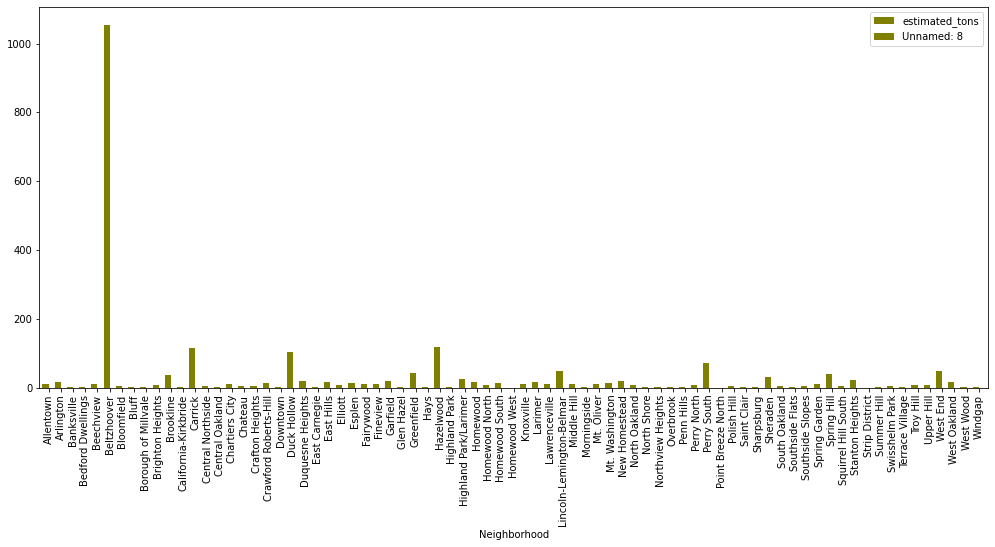

In [13]:
#bar chart to represent the estimated tons per neighborhood
neighborhood_totals.plot.bar(figsize=(17,7), width = 1, color = 'olive')

Beltzhoover seems to be extremely high to a point that might distort our data. Let's see how many times Beltzhoover appears in the dataset to find it is stinkier than the average neighborhood.

In [11]:
#Use groupy to group the data by neighborhood and count the amount of entries for each neighborhood
collection_counts = copy_pittsburgh.groupby("Neighborhood").count()
collection_counts.head()

,site_name,Status,City,estimated_tons,latitude,longitude,Unnamed: 8
Neighborhood,,,,,,,
Allentown,7,7,7,7,7,7,0
Arlington,9,9,9,9,9,9,0
Banksville,1,1,1,1,1,1,0
Bedford Dwellings,1,1,1,1,1,1,0
Beechview,8,8,8,8,7,7,0


Using loc to find the count for Beltzhoover, we find that Beltzhoover has 36 sites in the data set.

In [13]:
#using loc to find the count for Beltzhoover in the estimated tons column
collection_counts.loc["Beltzhoover","estimated_tons"]

36

Using the mean function, I found that there is an average of around 7.8 entries per neighborhood. With over 36 entries, Beltzhoover's entry count is significantly higher than the average.

In [12]:
#Find the average of entries
collection_counts.mean()

site_name         7.844156
Status            7.844156
City              7.844156
estimated_tons    7.844156
latitude          7.818182
longitude         7.818182
Unnamed: 8        0.000000
dtype: float64